In [1]:

"""import the txt files to python"""
import glob
import pandas as pd
import pickle
import os
import re
import shutil

# made this more explicit since I'm the only one using this script and also only once
PATH_IN = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01"
PATH_OUT_WRONG_RECALL = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana04\wrong_recall/"
PATH_OUT_ALL_CORRECT = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana04\all_correct/"

condition = '2backPS'

# Check if output directory exists, if not, create it
if not os.path.exists(PATH_OUT_WRONG_RECALL):
    os.makedirs(PATH_OUT_WRONG_RECALL)

# Check if unmatched directory exists, if not, create it
if not os.path.exists(PATH_OUT_ALL_CORRECT):
    os.makedirs(PATH_OUT_ALL_CORRECT)


print(os.getcwd())


c:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\imaginal_bottleneck\analysis


In [11]:
#------------------------------------------ 2nd version with 20s intervals! ----------------------------------------------------------------

import os
import glob
import pickle
import shutil

# Define input and output paths
PATH_IN = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01"
PATH_OUT_WRONG_RECALL = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana04\wrong_recall/"
PATH_OUT_ALL_CORRECT = r"C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana04\all_correct/"

# Ensure output directories exist
for path in [PATH_OUT_WRONG_RECALL, PATH_OUT_ALL_CORRECT]:
    if not os.path.exists(path):
        os.makedirs(path)

#---------------------------------------------------------------------------------------------------------------------------------------------------
        
# Dictionary to store trial information
trial_info = {}

if __name__ == '__main__':
    current_path_trace = os.path.join(PATH_IN, f'{condition}_trace_???.p')
    print(f"Searching for trace files in: {current_path_trace}")

    # Get all trace files for the specified condition
    all_runs_trace = glob.glob(current_path_trace)

    for i, run_trace_filename in enumerate(all_runs_trace):
        # Extract run number from the trace filename
        run_number = int(os.path.basename(run_trace_filename).split('_')[-1].split('.')[0])

        # Load trace data from pickle file
        formatted_run_trace = pickle.load(open(run_trace_filename, 'rb'))
        
        # Initialize trial count for current run
        trial_count = 0

        # Initialize interval occurrences dictionary for current run
        interval_occurrences = {}

        # Count occurrences of 'wrong-2back-recall' within 20-second intervals
        for timestamp, action in zip(formatted_run_trace['time'], formatted_run_trace['action']):
            try:
                timestamp = float(timestamp)  # Try to convert timestamp to float
            except ValueError:
                continue  # Skip if timestamp is not convertible to float
            interval_start = timestamp - (timestamp % 20)  # Start of the current 20-second interval
            if action == '** WRONG-2BACK-RECALL ** [goal1]' and not interval_occurrences.get(interval_start, False):
                interval_occurrences[interval_start] = True
                trial_count += 1  # Increment trial count for each new occurrence
        
        # Save trace file with the original filename
        print(f"{condition} Run {run_number} - Trace has {trial_count} occurrences of 'wrong_2back_recall'")
        trace_filename_wrong_recall = os.path.join(PATH_OUT_WRONG_RECALL, os.path.basename(run_trace_filename))
        pickle.dump(formatted_run_trace, open(trace_filename_wrong_recall, 'wb'))

        # Save trial information
        trial_info[run_number] = trial_count

    print(f"\nSearching for runs with wrong 2back recalls in {condition} model done!\n")




Searching for trace files in: C:\Users\pemas\OneDrive\Desktop\University\Master UOL\Research Project\Code Versions\with support mechanism nr1\Experiment Code\PS_experiment code\experiment_code_held2022-main\analysis\ana01\2backPS_trace_???.p
2backPS Run 2 - Trace has 0 occurrences of 'wrong_2back_recall'
2backPS Run 3 - Trace has 1 occurrences of 'wrong_2back_recall'
2backPS Run 5 - Trace has 2 occurrences of 'wrong_2back_recall'
2backPS Run 6 - Trace has 0 occurrences of 'wrong_2back_recall'
2backPS Run 11 - Trace has 0 occurrences of 'wrong_2back_recall'
2backPS Run 14 - Trace has 1 occurrences of 'wrong_2back_recall'
2backPS Run 15 - Trace has 0 occurrences of 'wrong_2back_recall'
2backPS Run 16 - Trace has 2 occurrences of 'wrong_2back_recall'
2backPS Run 19 - Trace has 2 occurrences of 'wrong_2back_recall'
2backPS Run 20 - Trace has 1 occurrences of 'wrong_2back_recall'
2backPS Run 21 - Trace has 0 occurrences of 'wrong_2back_recall'
2backPS Run 22 - Trace has 0 occurrences of 'wr

In [18]:
#_________________________________________ STATISTICS AND PLOTS ____________________________________________________________________________


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Overall statistics (# trial_info is the dict) 
total_trials = len(all_runs_trace)
trials_with_occurrences = sum(count > 0 for count in trial_info.values()) 
trials_without_occurrences = total_trials - trials_with_occurrences
average_occurrences = np.mean(list(trial_info.values()))
percentage_with_occurrences = (trials_with_occurrences / total_trials) * 100

print(f"Trials with 'wrong_2back_recall' occurrences:     {trials_with_occurrences} out of 130 ({percentage_with_occurrences:.2f}%)")
print(f"Trials without 'wrong_2back_recall' occurrences:  {trials_without_occurrences} out of 130 ({100 - percentage_with_occurrences:.2f}%)")
print(f"Average Occurrences of wrong 2back recalls':      {average_occurrences:.4f}\n")

# Frequency of Occurrences
occurrences_counts = np.bincount(list(trial_info.values()))
for count, frequency in enumerate(occurrences_counts):
    print(f"{frequency} runs had {count} occurrences of 'wrong_2back_recall'")
#------------------------------------------------ PLOTS ---------------------------------------------------------------------------------------------


Trials with 'wrong_2back_recall' occurrences:     84 out of 130 (64.62%)
Trials without 'wrong_2back_recall' occurrences:  46 out of 130 (35.38%)
Average Occurrences of wrong 2back recalls':      0.9231

46 runs had 0 occurrences of 'wrong_2back_recall'
55 runs had 1 occurrences of 'wrong_2back_recall'
22 runs had 2 occurrences of 'wrong_2back_recall'
7 runs had 3 occurrences of 'wrong_2back_recall'


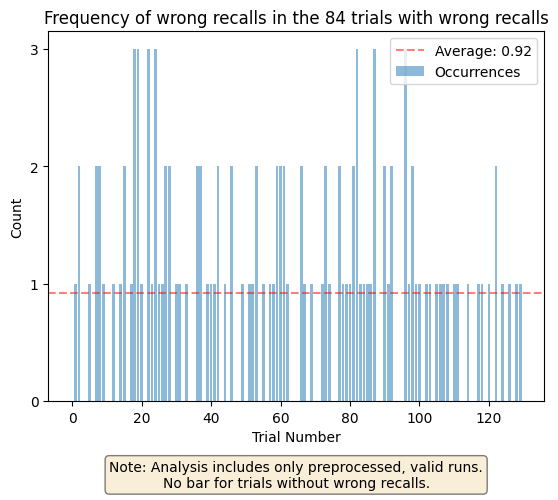

In [32]:
#____________________________________________ only the valid runs ___________________________________________________________________________


# Bar Plot with Average as Legend
plt.bar(range(len(trial_info)), trial_info.values(), label='Occurrences', alpha=0.5)
plt.axhline(y=average_occurrences, color='r', linestyle='--', label=f'Average: {average_occurrences:.2f}', alpha=0.5)
plt.xlabel('Trial Number')
plt.ylabel('Count')
plt.title(f'Frequency of wrong recalls in the 84 trials with wrong recalls')
plt.text(0.5, -0.20, 'Note: Analysis includes only preprocessed, valid runs.\nNo bar for trials without wrong recalls.', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.yticks(range(4))
plt.show()

In [ ]:
# Bar Plot with Average as Legend
plt.bar(trial_info.keys(), trial_info.values(), label='Occurrences', alpha=0.5)
plt.axhline(y=average_occurrences, color='r', linestyle='--', label=f'Average: {average_occurrences:.2f}', alpha=0.5)
plt.xlabel('Run Number (130 valid trials out of 250 total)')
plt.ylabel('Occurrences of wrong_2back_recall')
plt.title(f'Occurrences of wrong_2back_recall for each run in {condition} model')
plt.text(0.5, -0.15, 'Note: This plot shows the 130 (out of) preprocessed datasets, of which 84 had wrong recalls', transform=plt.gca().transAxes, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()
plt.show()


# Distribution of Occurrences (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(list(trial_info.values()), bins=np.arange(0, max(trial_info.values()) + 1) - 0.5, kde=True, label='Kernel Density Estimate')
plt.xlabel('Occurrences of wrong_2back_recall')
plt.ylabel('Frequency')
plt.title(f'Distribution of wrong_2back_recall occurrences in {condition} model')
plt.legend()  
plt.show()

In [ ]:
#------------------- outdated code - sometimes wrong-recall fires 2x but I only need to know how often per 20s it fires-------------------------------------------- 

# Dictionary to store trial information
# trial_info = {}


# if __name__ == '__main__':
#     current_path_trace = os.path.join(PATH_IN, f'{condition}_trace_???.p')
#     print(f"Searching for trace files in: {current_path_trace}")

#     # Get all trace files for the specified condition
#     all_runs_trace = glob.glob(current_path_trace)

#     for i, run_trace_filename in enumerate(all_runs_trace):
#         # Extract run number from the trace filename
#         run_number = int(os.path.basename(run_trace_filename).split('_')[-1].split('.')[0])

#         # Load trace data from pickle file
#         formatted_run_trace = pickle.load(open(run_trace_filename, 'rb'))

#         # Check if trace data has at least 1 occurrences of "wrong2back"
#         wrong2back_count = formatted_run_trace[formatted_run_trace['action'] == '** WRONG-2BACK-RECALL ** [goal1]'].shape[0]

#         if wrong2back_count > 0:
#             print(f"{condition} Run {run_number} - Trace has {wrong2back_count} occurrences of 'wrong_2back_recall'")

#             # Save trace file with the original filename
#             trace_filename_wrong_recall = os.path.join(PATH_OUT_WRONG_RECALL, os.path.basename(run_trace_filename))
#             pickle.dump(formatted_run_trace, open(trace_filename_wrong_recall, 'wb'))

#             # Save trial information
#             trial_info[run_number] = wrong2back_count
            
#         else:
#             print(f"{condition} Run {run_number} - Trace has no occurrences of 'wrong_2back_recall'")

#             # Copy both unmatched files for a trial to PATH_OUT_UNMATCHED
#             shutil.copy(run_trace_filename, os.path.join(PATH_OUT_ALL_CORRECT, os.path.basename(run_trace_filename)))

#     print(f"\nSearching for runs with wrong 2back recalls in {condition} model done!\n")

